In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

## PART - A

In [50]:
#1a)
df1 = pd.read_csv("Car name.csv")
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [51]:
#1b)
df2 = pd.read_json("Car-Attributes.json")
df2.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [52]:
print(df1.shape,df2.shape)

(398, 1) (398, 8)


In [53]:
#1c)
df = pd.concat([df1, df2], axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [56]:
#1d)
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#1e)
-- The average (mean) miles per gallon is approximately 23.51.
-- The minimum observed miles per gallon is 9, and the maximum is 46.6.
-- The standard deviation of the miles per gallon is around 7.82, indicating some variability in the data.
-- The minimum observed number of cylinders is 3, and the maximum is 8.
-- The standard deviation of the displacement is around 104.27, indicating significant variability in the data.
-- The minimum observed weight is 1613, and the maximum is 5140.
-- The origin seems to be a categorical variable with three unique values (1, 2, and 3).
The most frequently occurring origin is 1, as it appears in the 50th percentile (median) and has the highest count.


In [112]:
#2a)
df.isnull().sum()/df.shape[0]

car_name          0.0
mpg               0.0
cyl               0.0
disp              0.0
hp                0.0
wt                0.0
acc               0.0
yr                0.0
origin            0.0
cluster_labels    0.0
dtype: float64

In [58]:
#2b)
df[df.duplicated()]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


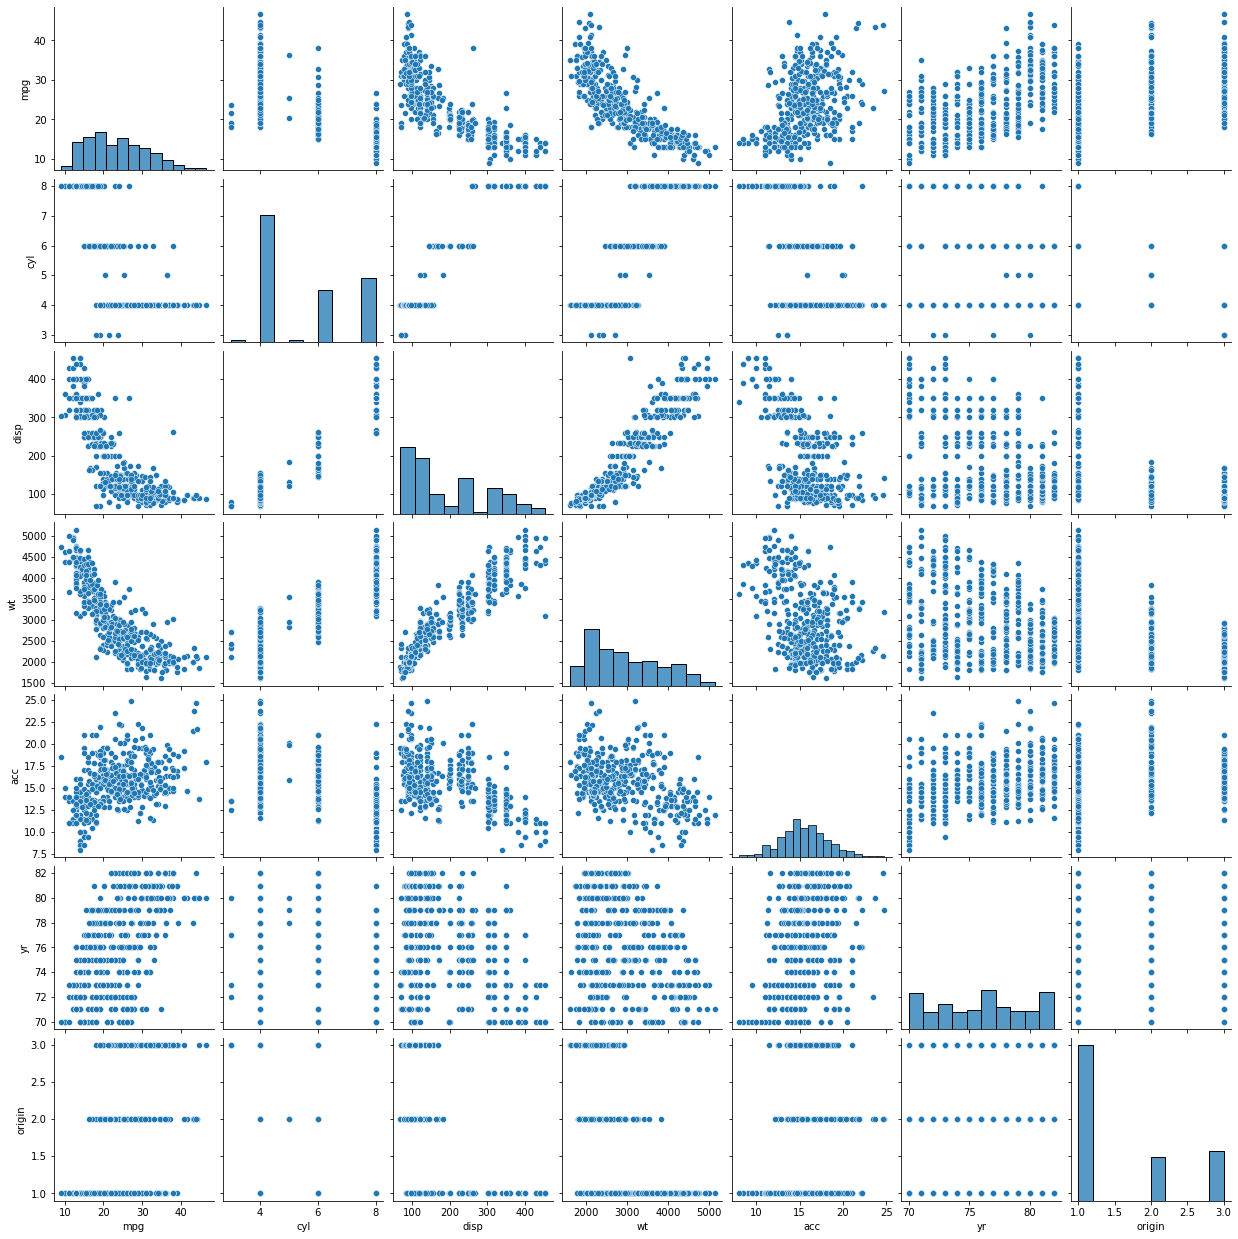

In [59]:
#2c)
sns.pairplot(df)
plt.show()

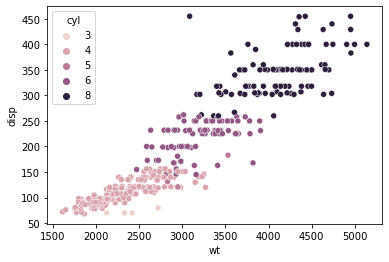

In [11]:
#2d)
sns.scatterplot(x=df["wt"],y=df["disp"],hue=df["cyl"])
plt.show()

In [12]:
#2e)

# if the displacement is increased weight of the car & no.of cylinders both are increasing.
# which is representing that display is directly proportional to both weight and no.of cylinders

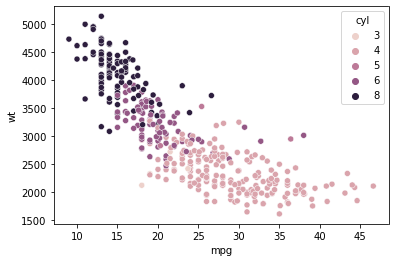

In [13]:
#2f)
sns.scatterplot(x=df["mpg"],y=df["wt"],hue=df["cyl"])
plt.show()

In [14]:
#2g)

# if the mpg(miles per gallon) is increasing both weight of the vehicle and no of cylinders are decreasing
# which is showing clearly that mpg is indirectly proportional to Weight and no of cylinders

In [60]:
#2h)

u_v = '?'

u_d_p = {}

for column in df.columns:
    u_vs = df[df[column] == u_v]
    if not u_vs.empty:
        u_d_p[column] = u_vs.index.tolist()

print("Unexpected Values in Features:")
print(u_d_p)



Unexpected Values in Features:
{'hp': [32, 126, 330, 336, 354, 374]}


In [61]:
df.replace(u_v, np.nan, inplace=True)

In [62]:
df["hp"] = df["hp"].astype("float")

In [63]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [64]:
df['hp'].fillna(df["hp"].median(), inplace=True)

In [77]:
#3a)

num_cols = ["mpg","cyl","disp","hp","wt","acc","yr","origin"]

df[num_cols] = df[num_cols].astype(float)

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster_' + str(n_clusters)] = kmeans.fit_predict(df[num_cols])

print("DataFrame with Clustering Results:")
df

DataFrame with Clustering Results:


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_labels,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,chevrolet chevelle malibu,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,3,1,0,1,4,3,5,6,4,5
1,buick skylark 320,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,3,1,0,1,4,3,5,2,2,5
2,plymouth satellite,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,3,1,0,1,4,3,5,2,4,5
3,amc rebel sst,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,3,1,0,1,4,3,5,2,4,5
4,ford torino,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,3,1,0,1,4,3,5,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145,2,0,1,3,2,5,2,1,8,7
394,vw pickup,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222,0,0,2,3,1,4,0,4,5,0
395,dodge rampage,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145,0,0,2,3,2,5,2,1,8,7
396,ford ranger,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145,2,0,1,3,2,5,2,1,8,7


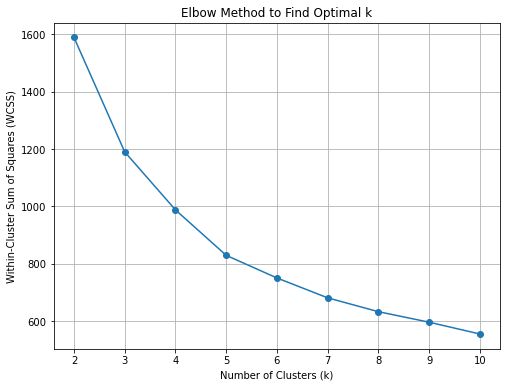

In [78]:
#3b)
wcss = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[num_cols])
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()

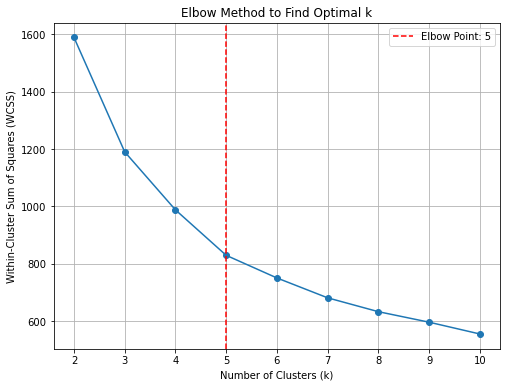

Elbow Point: 5


In [79]:
#3c)
wcss = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[num_cols])
    wcss.append(kmeans.inertia_)

kn = KneeLocator(range(2, 11), wcss, curve='convex', direction='decreasing')
elbow_point = kn.elbow

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point: {elbow_point}')
plt.legend()
plt.show()

print(f"Elbow Point: {elbow_point}")

In [80]:
#3d,3e)
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
df['cluster_labels'] = kmeans.fit_predict(df[num_cols])

In [81]:
df.drop(["cluster_2","cluster_3","cluster_4","cluster_5","cluster_6","cluster_7","cluster_8","cluster_9","cluster_10"],axis=1,inplace=True)

In [82]:
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_labels
0,chevrolet chevelle malibu,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,4
1,buick skylark 320,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,4
2,plymouth satellite,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,4
3,amc rebel sst,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,4
4,ford torino,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,4
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145,2
394,vw pickup,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222,1
395,dodge rampage,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145,2
396,ford ranger,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145,2


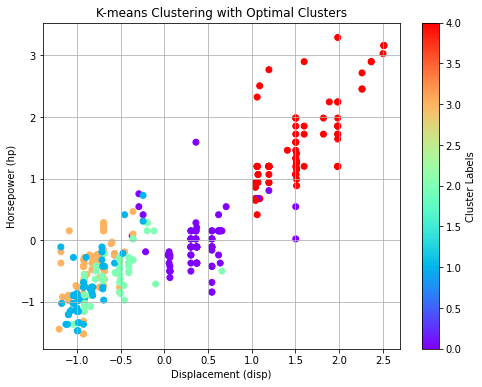

In [83]:
#3f)
plt.figure(figsize=(8, 6))
plt.scatter(df['disp'], df['hp'], c=df['cluster_labels'], cmap='rainbow')
plt.xlabel('Displacement (disp)')
plt.ylabel('Horsepower (hp)')
plt.title('K-means Clustering with Optimal Clusters')
plt.colorbar(label='Cluster Labels')
plt.grid(True)
plt.show()

In [84]:
new_data = {
    'mpg': [20.0, 25.0, 30.0],
    'cyl': [6.0, 4.0, 4.0],
    'disp': [220.0, 150.0, 100.0],
    'hp': [110.0, 100.0, 80.0],
    'wt': [3000.0, 2500.0, 2000.0],
    'acc': [15.0, 12.0, 10.0],
    'yr': [80.0, 81.0, 82.0],
    'origin': [1.0, 2.0, 3.0],
}
df_new = pd.DataFrame(new_data)

df_new

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,20.0,6.0,220.0,110.0,3000.0,15.0,80.0,1.0
1,25.0,4.0,150.0,100.0,2500.0,12.0,81.0,2.0
2,30.0,4.0,100.0,80.0,2000.0,10.0,82.0,3.0


In [87]:
#3g)

df_new[num_cols] = df_new[num_cols].astype(float)

scaler = StandardScaler()

df_new[num_cols] = scaler.fit_transform(df_new[num_cols])


df_new['cluster_labels'] = kmeans.predict(df_new[num_cols])

df_new

,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_labels
0,-1.224745,1.414214,1.286842,1.069045,1.224745,1.297771,-1.224745,-1.224745,4
1,0.000000,-0.707107,-0.135457,0.267261,0.000000,-0.162221,0.000000,0.000000,3
2,1.224745,-0.707107,-1.151385,-1.336306,-1.224745,-1.135550,1.224745,1.224745,1


## PART - B

In [104]:
#1a)
vh = pd.read_csv("vehicle-1 (2).csv")
vh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [105]:
vh.shape

(846, 19)

In [106]:
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [107]:
vh.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [108]:
#1b)
vh.isnull().sum()/vh.shape[0]

compactness                    0.000000
circularity                    0.005910
distance_circularity           0.004728
radius_ratio                   0.007092
pr.axis_aspect_ratio           0.002364
max.length_aspect_ratio        0.000000
scatter_ratio                  0.001182
elongatedness                  0.001182
pr.axis_rectangularity         0.003546
max.length_rectangularity      0.000000
scaled_variance                0.003546
scaled_variance.1              0.002364
scaled_radius_of_gyration      0.002364
scaled_radius_of_gyration.1    0.004728
skewness_about                 0.007092
skewness_about.1               0.001182
skewness_about.2               0.001182
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [109]:
x= vh.isnull().sum()

In [110]:
it = x[x>0].index

for i in it:
    vh[i].fillna(vh[i].median(),inplace=True)

In [111]:
vh.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

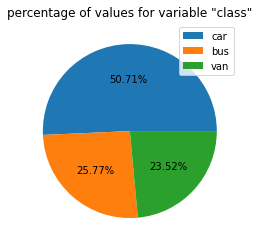

In [117]:
#1c)
plt.pie(x = vh["class"].value_counts(),autopct="%.2f%%")
plt.legend(vh["class"].value_counts().index)
plt.title('''percentage of values for variable "class"''')
plt.show()

In [118]:
#1d)

vh[vh.duplicated()]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [123]:
#2a)
X = vh.drop(columns=['class']) 
y = vh['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (676, 18)
X_test shape: (170, 18)
y_train shape: (676,)
y_test shape: (170,)


In [130]:
#2b)

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

X_train_sc_vh = pd.DataFrame(X_train_sc, columns=X.columns)

X_test_sc_vh = pd.DataFrame(X_test_sc, columns=X.columns)

X_train_sc_vh['class'] = y_train
X_test_sc_vh['class'] = y_test

print("Scaled Training Data:")
X_train_sc_vh.head()

Scaled Training Data:


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-0.443190,0.349898,0.182642,-0.252763,0.249020,0.252818,-0.169670,0.129128,-0.213492,0.818422,-0.360671,-0.276567,0.331933,0.086293,0.522964,-1.434963,-0.644109,-0.124558,van
1,1.008227,1.156070,1.206724,1.274414,0.249020,0.252818,1.058019,-1.033025,0.972702,0.614846,0.837350,1.039353,0.362851,-0.949610,-1.296198,0.690099,0.629508,0.954946,van
2,1.371081,1.317305,1.654760,1.068832,0.129036,0.650734,1.641171,-1.291281,1.763498,1.361293,1.225897,1.595865,0.826620,-0.172682,1.735739,2.479625,-0.007301,0.954946,NaN
3,2.580596,1.156070,1.142719,0.980726,0.009052,0.252818,1.487710,-1.291281,1.368100,1.157716,1.323034,1.508910,1.228553,-0.043195,1.533610,-0.987581,-0.166503,0.145318,van
4,1.854887,1.639774,0.886699,0.628301,-0.590867,-0.543014,2.224324,-1.678665,2.158896,1.497011,2.553433,2.436431,2.094254,1.640148,0.320835,-0.428354,-0.803312,-1.608876,bus


In [128]:
print("\nScaled Testing Data:")
X_test_sc_vh.head()


Scaled Testing Data:


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-1.531754,0.027429,-0.905446,-0.017812,1.328873,-0.543014,-0.537977,0.387384,-0.608889,-0.131602,-0.490186,-0.583808,0.362851,0.345269,0.118706,-1.434963,-0.962514,-0.934186,NaN
1,0.161567,-1.101213,-1.033456,-1.280670,-1.190786,-0.145098,-1.090437,1.420409,-1.004287,-0.538755,-0.975870,-1.064959,-1.059373,0.733733,0.927222,-0.540200,-0.803312,-1.743814,NaN
2,-0.443190,-0.456275,-1.225471,-1.280670,-0.830834,-0.344056,-0.507284,0.516512,-0.608889,-0.403037,-0.490186,-0.583808,-0.039082,1.122196,-1.296198,0.242718,-1.440120,-1.608876,car
3,-0.564142,-0.456275,-0.137384,-0.546450,0.009052,-0.543014,-0.752822,0.645641,-0.608889,-0.606614,-0.716839,-0.746124,-0.131836,0.215781,2.139997,0.019027,-0.644109,-0.934186,NaN
4,-1.531754,0.188663,-0.713430,-1.163195,-0.710851,-0.344056,-0.476592,0.387384,-0.608889,0.071975,-0.522565,-0.549026,0.517441,1.122196,-0.689810,0.130872,-1.440120,-1.339000,NaN


In [131]:
#3a)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_sc_vh.drop(columns=['class']), y_train)

y_pred = svm_model.predict(X_test_sc_vh.drop(columns=['class']))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model:", accuracy)

Accuracy of the SVM model: 0.9352941176470588


In [133]:
#3b)

from sklearn.metrics import classification_report, confusion_matrix


y_train_pred = svm_model.predict(X_train_sc_vh.drop(columns=['class']))


print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.94      0.96      0.95       166
         car       0.98      0.97      0.97       351
         van       0.97      0.97      0.97       159

    accuracy                           0.97       676
   macro avg       0.96      0.97      0.96       676
weighted avg       0.97      0.97      0.97       676



In [134]:
#3c)

from sklearn.decomposition import PCA


pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train_sc_vh.drop(columns=['class']))
X_test_pca = pca.transform(X_test_sc_vh.drop(columns=['class']))

X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(10)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(10)])

X_train_pca_df['class'] = y_train.values
X_test_pca_df['class'] = y_test.values


print("Data after PCA with 10 components:")
X_train_pca_df.head()

Data after PCA with 10 components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,-0.108013,0.859553,0.233667,1.589269,-0.434747,-0.567287,-0.103270,0.494389,-0.274836,0.292729,van
1,3.304115,-1.238090,0.054202,-1.214527,-0.924130,-0.495663,0.042902,-0.073610,-0.253800,-0.054080,car
2,4.865603,-0.676242,-0.413415,-0.695719,2.597824,-0.470098,-0.193125,-0.016441,-0.106778,0.393331,car
3,4.553991,0.217619,-0.608888,1.633308,0.431826,0.849135,0.976681,-0.354993,-0.591903,-0.227665,car
4,5.557713,2.993475,-1.471294,0.128443,-0.046786,1.545973,0.425878,-0.746684,0.584000,-0.050450,bus


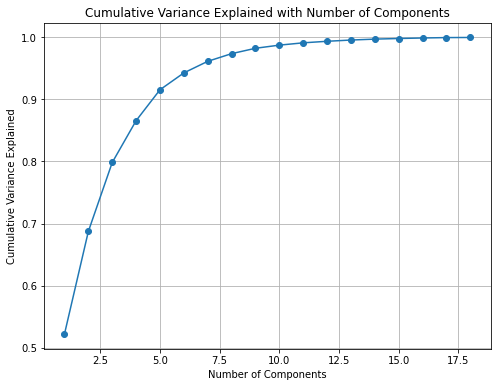

In [135]:
#3d)

pca_full = PCA()


pca_full.fit(X_train_sc_vh.drop(columns=['class']))

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained with Number of Components')
plt.grid(True)
plt.show()


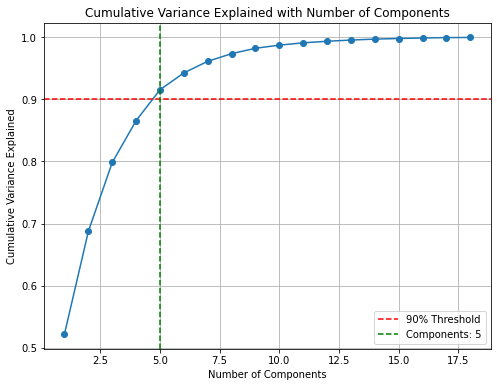

In [136]:
#3e)

pca_full = PCA()


pca_full.fit(X_train_sc_vh.drop(columns=['class']))


cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

index_90_percent = np.argmax(cumulative_variance >= 0.9) + 1

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
plt.axvline(x=index_90_percent, color='green', linestyle='--', label='Components: ' + str(index_90_percent))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained with Number of Components')
plt.grid(True)
plt.legend()
plt.show()


In [137]:
#3f)

desired_variance = 0.90
pca = PCA(n_components=desired_variance)


X_train_pca = pca.fit_transform(X_train_sc_vh.drop(columns=['class']))
X_test_pca = pca.transform(X_test_sc_vh.drop(columns=['class']))

X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

X_train_pca_df['class'] = y_train.values
X_test_pca_df['class'] = y_test.values

print("Data after PCA with minimum components for 90% variance:")
X_train_pca_df.head()


Data after PCA with minimum components for 90% variance:


,PC1,PC2,PC3,PC4,PC5,class
0,-0.108013,0.859553,0.233667,1.589269,-0.434747,van
1,3.304115,-1.238090,0.054202,-1.214527,-0.924130,car
2,4.865603,-0.676242,-0.413415,-0.695719,2.597824,car
3,4.553991,0.217619,-0.608888,1.633308,0.431826,car
4,5.557713,2.993475,-1.471294,0.128443,-0.046786,bus


In [138]:
#3g)


X_train_pca = X_train_pca_df.drop(columns=['class'])
X_test_pca = X_test_pca_df.drop(columns=['class'])
y_train = X_train_pca_df['class']
y_test = X_test_pca_df['class']

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model:", accuracy)


Accuracy of the SVM model: 0.6411764705882353


In [139]:
#3h)

y_train_pred = svm_model.predict(X_train_pca)

print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))

Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.58      0.55      0.57       166
         car       0.77      0.82      0.79       351
         van       0.57      0.51      0.54       159

    accuracy                           0.68       676
   macro avg       0.64      0.63      0.63       676
weighted avg       0.67      0.68      0.68       676



-- The accuracy of the model on the train data is approximately 68%. 
    This means that the model correctly predicts the class labels for about 68%
-- It appears that the dataset may be imbalanced, as indicated by the differences  
    in the number of instances (support) for each class. 
    The "car" class has the largest support, followed by "bus" and "van" classes. 

In [141]:
#4a)

from sklearn.model_selection import GridSearchCV


svm_model = SVC(random_state=42)


param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'], 
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_pca, y_train)


best_svm_model = grid_search.best_estimator_


y_pred = best_svm_model.predict(X_test_pca)

print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred))



Classification Report for Test Data:
              precision    recall  f1-score   support

         bus       0.83      0.75      0.79        52
         car       0.82      0.90      0.86        78
         van       0.71      0.68      0.69        40

    accuracy                           0.80       170
   macro avg       0.79      0.77      0.78       170
weighted avg       0.80      0.80      0.80       170



In [142]:
#4b)

print("Best Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'C': 10, 'kernel': 'rbf'}


#4c)

-- Default SVM Model Performance (Train Data):

   * The default SVM model has an accuracy of approximately 68% on the training data.

   * The model performs relatively better for the "car" class with a precision of 77%, recall of 82%, and F1-score of 79%.

-- Best SVM Model Performance (Train Data):

   * After tuning hyperparameters with GridSearchCV, the best SVM model achieves an accuracy of approximately 80% on the training data.

   * The model's performance has significantly improved for the "bus" class with a precision of 83%, recall of 75%, and F1-score of 79%.


`Overall Insights`:

* The best SVM model demonstrates a notable improvement in overall accuracy compared to the default SVM model.
* The improvements are particularly prominent for the "bus" class, where the best model achieves higher precision and recall, leading to a higher F1-score.
* For the other classes ("car" and "van"), the performance remains stable or slightly improves with the best SVM model.

#5a)

`Pre-requisites and Assumptions of PCA:`

* Numerical Data(PCA is primarily designed for numerical data)
* Linearity(PCA assumes that the relationship between variables is linea.)
* Centering( PCA assumes that the data is centered around the origin)
* Scale(PCA is sensitive to the scale of the variables)
* High Variability(PCA works best when there is significant variability in the data)
* Data Distribution(PCA assumes that the data follows a multivariate normal distribution)
* Orthogonal Components(PCA aims to find orthogonal components, meaning that the principal components are uncorrelated with each other)
* Independence of Principal Components(PCA assumes that the principal components are independent of each other)

#5b)

``Advantages of PCA:``

`Dimensionality Reduction:` PCA helps reduce the number of features in high-dimensional datasets, making it computationally efficient and easier to visualize.

`Feature Combination:` It creates new uncorrelated features (principal components) that are linear combinations of original features, preserving most of the variance in the data.

`Information Retention:` PCA retains the most important patterns and relationships in the data, allowing for meaningful analysis and interpretation.

`Noise Reduction: `PCA filters out noise and focuses on the most significant patterns, leading to improved performance in certain tasks.

`Multicollinearity Handling:` It addresses multicollinearity among variables, making models more stable and reliable.

``Limitations of PCA:``

`Linearity Assumption:` PCA assumes linear relationships among variables, limiting its effectiveness for datasets with complex non-linear structures.

`Interpretability:` Interpretation of principal components can be challenging, as they are linear combinations of original features.

`Loss of Information:` While PCA retains most variance, there is still some information loss during dimensionality reduction.

`Scaling Sensitivity:` PCA is sensitive to the scale of variables, requiring appropriate scaling before application.

`Suitable for Continuous Data:` PCA is designed for numerical data, and may not be applicable to categorical or binary data.

`Outliers Impact:` Outliers can significantly affect PCA results and should be treated before applying PCA.

`Computational Cost:` PCA can be computationally expensive for very large datasets.